# Homework 2

## Feedforward: Building a ReLU neural net-work

Consider the rectified linear activation function : $h_j = max(0, a_j )$.

### 1. Draw a network

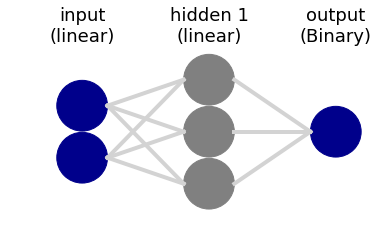

In [2]:
from nnv import NNV

layersList = [
    {"title":"input\n(linear)", "units": 2, "color": "darkBlue"},
    {"title":"hidden 1\n(linear)", "units": 3},
    {"title":"output\n(Binary)", "units": 1,"color": "darkBlue"},
]

plot = NNV(layersList).render(save_to_file="my_example.png")

### 2. Write out the mathematical equation for the output of this network

<img src="hw2_q1_plot.png">

$$
\begin{align}
y &= g(v_1h_1 + v_2h_2 + v_3h_3 + c) \\
&=g(v_1f(w_11x_1 + w_12x_2 + b_1) + v_2f(w_21x_1 + w_22x_2 + b_2) + v_3f(w_31x_1 + w_32x_2 + b_3) + c)
\end{align} 
$$

### 3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [9]:
# ReLU function
def ReLU(x):
  return np.maximum(0,x)

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def ff_nn__ReLu(x, w, v, b_1, b_2):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    
    h = ReLU(np.dot(x,w) + b_1)
    y = sigmoid(np.dot(h,v) + b_2)

    return np.array(y)

### 4. The class probabilities associated with the forward pass of each sample

In [17]:
import numpy as np
x = np.array([[1,-1],[0,-1],[0,1]])
w = np.array([[1,-1,0],[0,0,0.5]])
v = np.array([1,0,-1])
b_1 = np.array([0,0,1])
b_2 = 1
ff_nn__ReLu(x, w, v, b_1, b_2)

array([0.81757448, 0.62245933, 0.37754067])

## Gradient Descent

Consider a simple non-convex function of two variables:
$$
f(x,y) = (1-x^3) + 100 * (y^2 - x)^2
$$

### 1. What are the partial derivatives of f with respect to x and to y?

$$
f^\prime(x,y)_x = - 3x^2 - 200 (y^2 - x) = - 3x^2 - 200 y^2 + 200 x\\
f^\prime(x,y)_y =200 * 2 y (y^2 - x) = 400(y^3 - xy)
$$

### 2. Create a visualization of the contours of the Rosenbrock function.

In [5]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

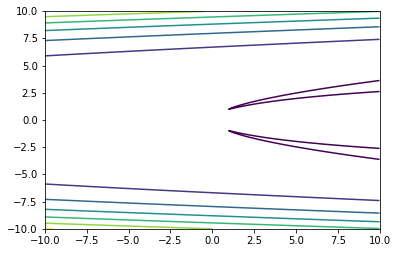

In [65]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = 1 - X**3 + 100*(Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [66]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 200*y**2 + 200*x
    df_dy = 400*(y**3 - x*y)
    return np.array([df_dx, df_dy])

def grad_descent(x,y, iterations=10, learning_rate=12):
    point = np.array([x,y])
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

### Leanrning rate = 0.01

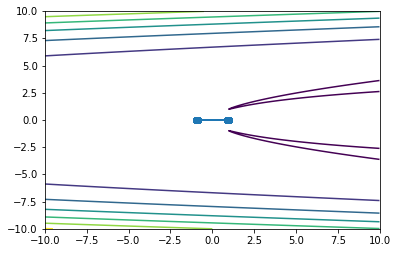

In [37]:
#import warnings
#warnings.filterwarnings("ignore")
np.random.seed(100)
traj = grad_descent(1,0, iterations=200, learning_rate=0.01)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Leanrning rate = 0.001

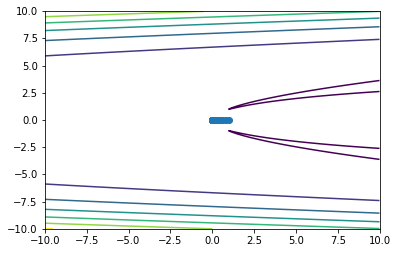

In [38]:
#import warnings
#warnings.filterwarnings("ignore")
np.random.seed(100)
traj = grad_descent(1,0, iterations=200, learning_rate=0.001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Leanrning rate = 0.05

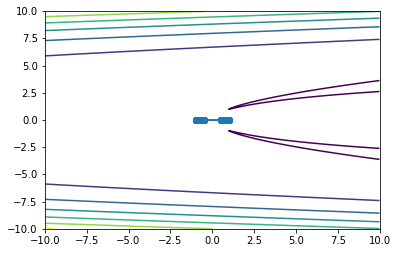

In [132]:
#import warnings
#warnings.filterwarnings("ignore")
np.random.seed(100)
traj = grad_descent(1,0, iterations=1500, learning_rate=0.01)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 4. Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [67]:
def grad_descent_with_momentum(x=None,y=None, iterations=10, alpha=.9, epsilon=10):
    if x:
        point = np.array([x,y])
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

### epsilon=0.01, alpha=0.005

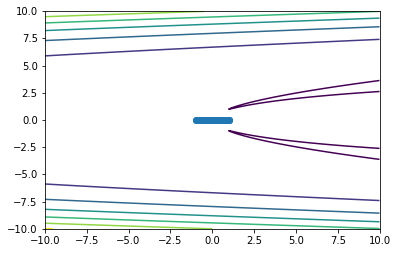

In [70]:
traj = grad_descent_with_momentum(1,0, iterations=200, epsilon=0.01, alpha=0.005)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### epsilon=0.01, alpha=0.05

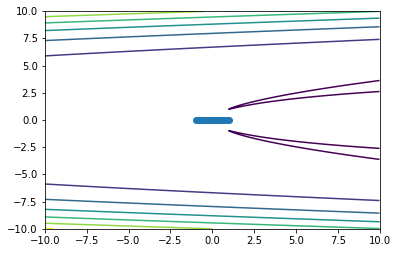

In [71]:
traj = grad_descent_with_momentum(1,0, iterations=200, epsilon=0.01, alpha=0.05)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### epsilon=0.01, alpha=0.5

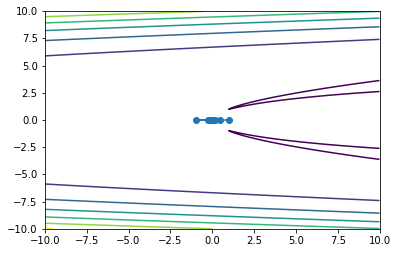

In [73]:
traj = grad_descent_with_momentum(1,0, iterations=200, epsilon=0.01, alpha=0.5)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

###  epsilon=0.1, alpha=0.5

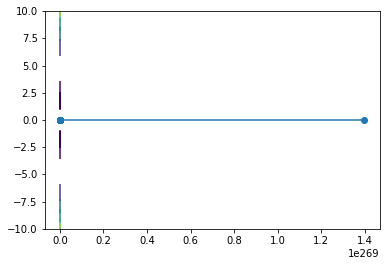

In [76]:
traj = grad_descent_with_momentum(1,0, iterations=200, epsilon=0.1, alpha=0.5)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#### When I set  epsilon=0.1, alpha=0.5, there would be a gradient exploding problem. 

## Backprop

### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

<img src="hw2_q1_plot.png">

Loss Function L:

$$
L = -y_i log(\hat y_i) -( 1 - y_i ) log (1 - \hat y_i)
$$

Derive Gradients:

<img src="Derive_Gradients.png">

### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [27]:
def pack_params(param_vec):
    w_11, w_12, w_13, w_21, w_22, w_23, b_1, b_2, b_3, v_11, v_12, v_13, c_1 = param_vec
    W = np.array([[w_11,w_12,w_13],[w_21,w_22,w_23]])
    b = np.array([b_1, b_2, b_3])
    v = np.array([v_11, v_12, v_13])
    c = c_1
    return((W, b, v, c))
    
def unpack_params(W,b,v,c):
    w_11, w_12, w_13, w_21, w_22, w_23 = W[0,0], W[0,1],W[0,2], W[1,0], W[1,1], W[1,2]
    b_1, b_2, b_3 = b[0], b[1], b[2]
    v_11, v_12, v_13 = v[0], v[1], v[2]
    c_1 = c
    return np.array([w_11, w_12, w_13, w_21, w_22, w_23, b_1, b_2, b_3, v_11, v_12, v_13, c_1])

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)+(1- y)*np.log(1 - y_hat)
    return  -tot.sum()

def binary_xent_residual(y, y_hat):
    return -(y/y_hat - (1-y)/(1-y_hat))

def yhat(x, W, b, v, c):
    # returns model prediction 
    a1 = x.dot(W) + b
    H = relu(a1)
    a2 = H.dot(v) + c
    y_hat = sigmoid(a2)
    return y_hat

In [7]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    v_new = np.reshape(v, (1,3))
    
    a1 = x.dot(W) + b
    H = relu(a1)
    a2 = H.dot(v) + c
    y_hat = sigmoid(a2)

    y_sigmoid = binary_xent_residual(y, y_hat) * sigmoid_derivative(a2) 
    y_sigmoid_new = np.reshape(y_sigmoid,(500,1))
    d_v =  H.T.dot(y_sigmoid_new)
    d_c = y_sigmoid.sum(axis=0)
    d_b = (y_sigmoid_new.dot(v_new)*(H > 0)).sum(axis=0)
    d_W = x.T.dot(y_sigmoid_new.dot(v_new)*(H > 0))
    
    param_vec = unpack_params(d_W, d_b, d_v, d_c)
    return np.array(param_vec)

def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=13).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

### 3. Generate a synthetic dataset like the XOR pattern (see below).

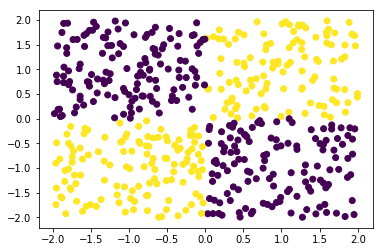

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import pandas as pd
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

plt.scatter(x[:,0], x[:,1], c=y)

### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [66]:
import warnings
warnings.filterwarnings("ignore")
traj, losses = grad_descent(x, y, iterations=10000,learning_rate=0.0001)

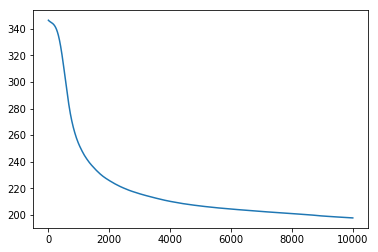

In [67]:
plt.plot(losses)

### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [57]:
def grad_descent_with_momentum(x, y,  iterations=2000, alpha=.00009, epsilon=1):
    point = np.random.uniform(-.1,.1,size=13).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point -  v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

In [58]:
warnings.filterwarnings("ignore")
traj1, losses1 = grad_descent_with_momentum(x, y,  iterations=100, alpha=0.001, epsilon=1e-2)

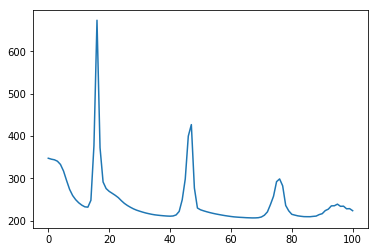

In [59]:
plt.plot(losses1)

#### Yes, algorithm seems to converge more efficiently with  Momentum, we can observe that the converge steps reduced.

### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import pandas as pd

In [70]:
weights = traj[1000]
W, b, v, c = pack_params(weights)

In [37]:
def model(x):
    z = []
    for i in x:
        a1 = i.dot(W) + b
        H = relu(a1)
        a2 = H.dot(v) + c
        y_hat = sigmoid(a2)
        z.append(y_hat)
    z = [1 if i > 0.8 else 0 for i in z ]
    z_array = np.array(z)
    return z_array

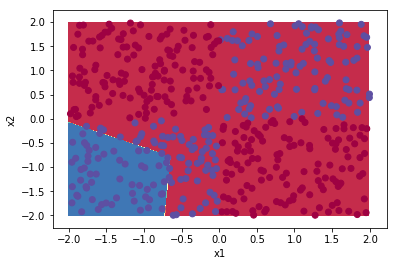

In [71]:
x_min, x_max = -2,2
y_min, y_max = -2,2
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))   

Z = model(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)   
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(x[:,0], x[:,1],  c=np.squeeze(y), cmap=plt.cm.Spectral)
plt.show()